Test Accuracy: 0.87
Confusion Matrix:
[[205  68]
 [  3 285]]


/var/folders/z4/9nps5tq53hsf6z3chykw9wrh0000gn/T/ipykernel_10034/1142284760.py:74: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


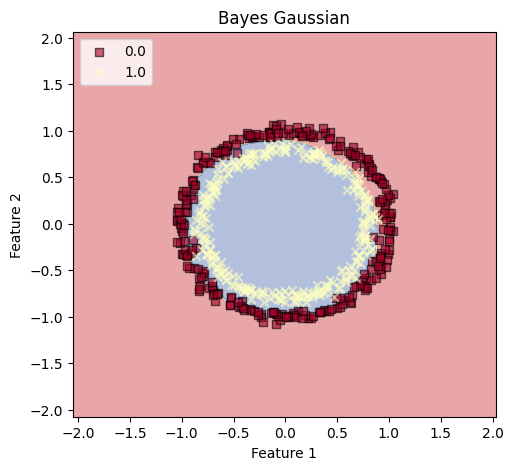

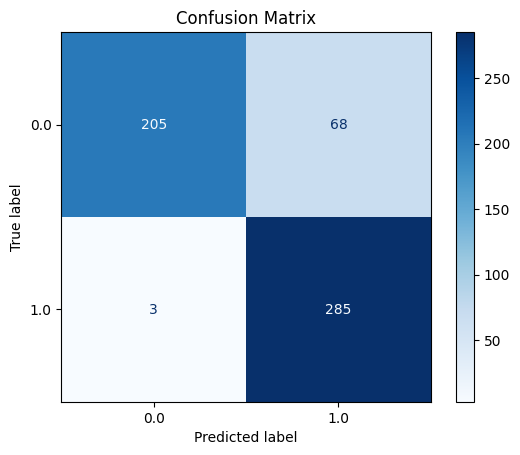

In [12]:
#DATASET 2 BAYES GAUSSIAN
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


class GaussianBayesClassifier:
    def __init__(self):
        self.classes = None
        self.means = None
        self.covariances = None
        self.priors = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]
        self.means = np.zeros((n_classes, n_features))
        self.covariances = np.zeros((n_classes, n_features, n_features))
        self.priors = np.zeros(n_classes)
        
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[idx] = np.mean(X_c, axis=0)
            self.covariances[idx] = np.cov(X_c.T)
            self.priors[idx] = len(X_c) / len(X)

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
        posteriors = []
        
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            inv_cov = np.linalg.inv(self.covariances[idx])
            diff = x - self.means[idx]
            
            log_likelihood = -0.5 * np.dot(np.dot(diff.T, inv_cov), diff)
            log_likelihood -= 0.5 * np.log(np.linalg.det(self.covariances[idx]))
            log_likelihood -= len(self.classes) * 0.5 * np.log(2 * np.pi)
            
            posterior = prior + log_likelihood
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]

def load_data(filename):
    data = np.genfromtxt(filename, delimiter=',', skip_header=1)
    X = data[:, :2]
    y = data[:, 2]
    return X, y

def plot_decision_regions(classifier, X, y, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx / len(np.unique(y)))],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.title('Gaussian Bayes Classifier Decision Regions')

# Load and prepare the data
X_train, y_train = load_data('./team20/Dataset-2/Train.csv')  # Assuming you have a train.csv file
X_test, y_test = load_data('./team20/Dataset-2/Train.csv')

# Create and train the classifier
classifier = GaussianBayesClassifier()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)


# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.2f}")

plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_decision_regions(classifier, X_test, y_test)
plt.title('Bayes Gaussian')

cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



Test Accuracy (Shared Covariance): 0.54
Test Accuracy (Different Covariances): 0.90


/var/folders/z4/9nps5tq53hsf6z3chykw9wrh0000gn/T/ipykernel_10034/4148750931.py:83: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


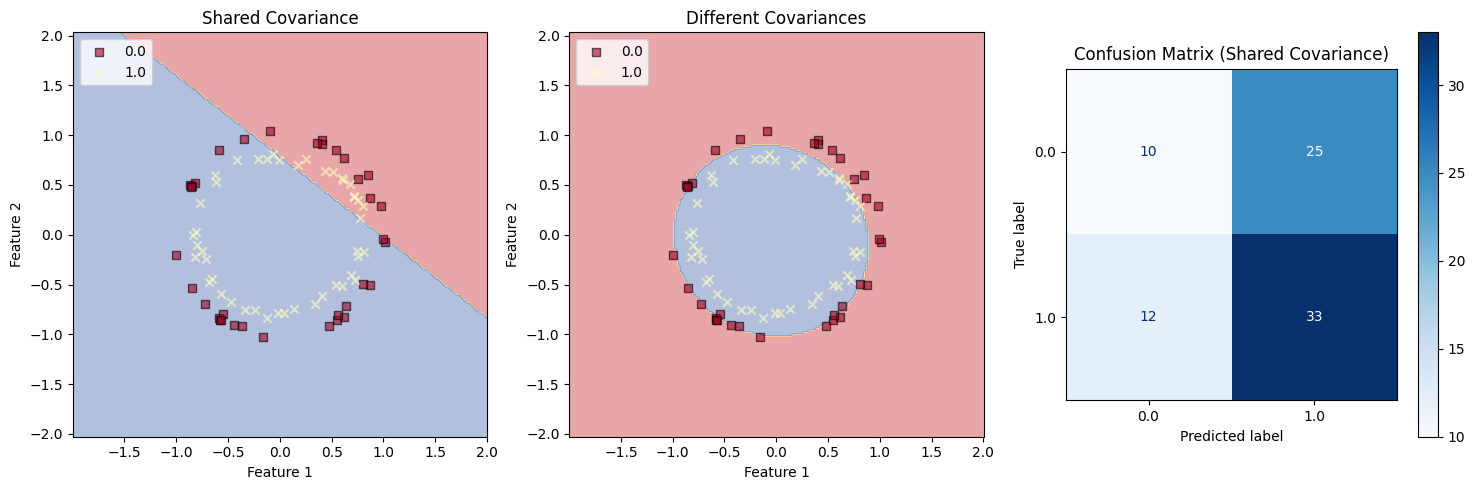

<Figure size 640x480 with 0 Axes>

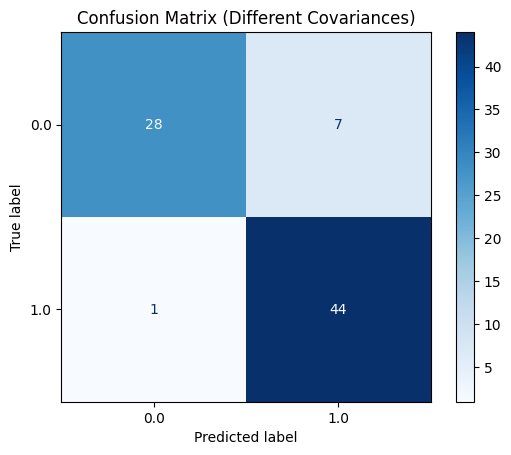

In [10]:

#Bayes Guassian Dataset 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class GaussianBayesClassifier:
    def __init__(self, shared_covariance=False):
        self.classes = None
        self.means = None
        self.covariances = None
        self.shared_covariance = shared_covariance
        self.priors = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]
        self.means = np.zeros((n_classes, n_features))
        self.covariances = np.zeros((n_classes, n_features, n_features))
        self.priors = np.zeros(n_classes)
        
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[idx] = np.mean(X_c, axis=0)
            self.covariances[idx] = np.cov(X_c.T)
            self.priors[idx] = len(X_c) / len(X)
        
        if self.shared_covariance:
            # Calculate the average of all covariance matrices
            self.covariances = np.mean(self.covariances, axis=0)

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
        posteriors = []
        
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            
            if self.shared_covariance:
                inv_cov = np.linalg.inv(self.covariances)
                cov_det = np.linalg.det(self.covariances)
            else:
                inv_cov = np.linalg.inv(self.covariances[idx])
                cov_det = np.linalg.det(self.covariances[idx])
            
            diff = x - self.means[idx]
            
            log_likelihood = -0.5 * np.dot(np.dot(diff.T, inv_cov), diff)
            log_likelihood -= 0.5 * np.log(cov_det)
            log_likelihood -= len(self.classes) * 0.5 * np.log(2 * np.pi)
            
            posterior = prior + log_likelihood
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]

def load_data(filename):
    data = np.genfromtxt(filename, delimiter=',', skip_header=1)
    X = data[:, :2]
    y = data[:, 2]
    return X, y

def plot_decision_regions(classifier, X, y, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx / len(np.unique(y)))],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.title('Gaussian Bayes Classifier Decision Regions')

# Load and prepare the data
X_train, y_train = load_data('./team20/Dataset-2/Train.csv')  # Assuming you have a train.csv file
X_test, y_test = load_data('./team20/Dataset-2/Test.csv')

# Create and train the classifiers
classifier_shared = GaussianBayesClassifier(shared_covariance=True)
classifier_shared.fit(X_train, y_train)

classifier_different = GaussianBayesClassifier(shared_covariance=False)
classifier_different.fit(X_train, y_train)

# Make predictions
y_pred_shared = classifier_shared.predict(X_test)
y_pred_different = classifier_different.predict(X_test)

# Calculate accuracies
accuracy_shared = np.mean(y_pred_shared == y_test)
accuracy_different = np.mean(y_pred_different == y_test)

print(f"Test Accuracy (Shared Covariance): {accuracy_shared:.2f}")
print(f"Test Accuracy (Different Covariances): {accuracy_different:.2f}")

# Confusion matrices
cm_shared = confusion_matrix(y_test, y_pred_shared)
cm_different = confusion_matrix(y_test, y_pred_different)

# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_decision_regions(classifier_shared, X_test, y_test)
plt.title('Shared Covariance')

plt.subplot(132)
plot_decision_regions(classifier_different, X_test, y_test)
plt.title('Different Covariances')

plt.subplot(133)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_shared, display_labels=classifier_shared.classes)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Confusion Matrix (Shared Covariance)')

plt.tight_layout()
plt.show()

# Plot confusion matrix for different covariances
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm_different, display_labels=classifier_different.classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Different Covariances)')
plt.show()

Test Accuracy: 0.91


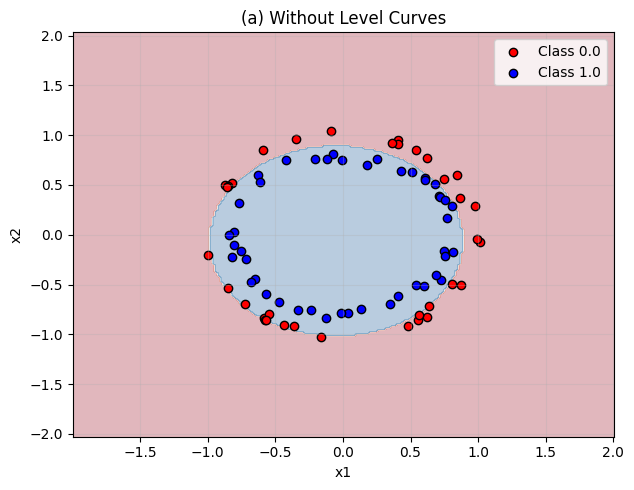

Confusion Matrix:
[[28  7]
 [ 0 45]]


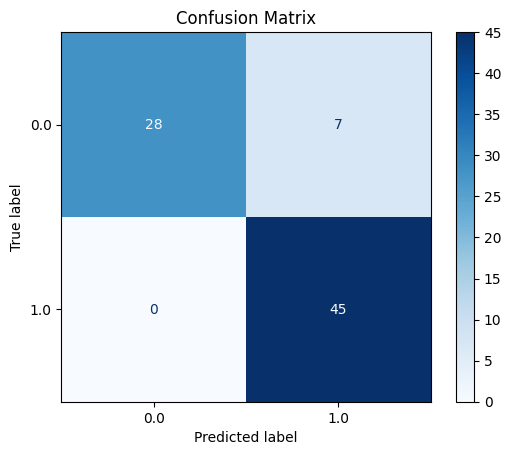

In [11]:
#DATASET 1 NAIVE BAYES
import numpy as np
import matplotlib.pyplot as plt

class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.means = None
        self.variances = None
        self.priors = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]
        
        self.means = np.zeros((n_classes, n_features))
        self.variances = np.zeros((n_classes, n_features))
        self.priors = np.zeros(n_classes)
        
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[idx, :] = X_c.mean(axis=0)
            self.variances[idx, :] = X_c.var(axis=0)
            self.priors[idx] = len(X_c) / len(X)

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
        posteriors = []
        
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            posterior = prior
            #calculating posterior prob. fopr each feature
            for feat, mean, var in zip(x, self.means[idx], self.variances[idx]):
                posterior += self._log_gaussian_pdf(feat, mean, var)
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]

    def _log_gaussian_pdf(self, x, mean, var):
        return -0.5 * np.log(2 * np.pi * var) - 0.5 * ((x - mean) ** 2) / var

def load_data(filename):
    data = np.genfromtxt(filename, delimiter=',', skip_header=1)
    X = data[:, :2]
    y = data[:, 2]
    return X, y

#------------
def plot_decision_regions(classifier, X, y, resolution=0.02, with_level_curves=False):
    cmap = plt.cm.RdBu
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=1, 
                    c=['red' if cl == 0 else 'blue'],
                    edgecolor='black',
                    marker='o', 
                    label=f'Class {cl}')
    
    if with_level_curves:
        X_c0 = X[y == 0]
        X_c1 = X[y == 1]
        
        mean_c0 = np.mean(X_c0, axis=0)
        cov_c0 = np.cov(X_c0.T)
        mean_c1 = np.mean(X_c1, axis=0)
        cov_c1 = np.cov(X_c1.T)
        
        for n_std in range(1, 4):
            plot_ellipse(mean_c0, cov_c0, n_std, color='red', alpha=0.3)
            plot_ellipse(mean_c1, cov_c1, n_std, color='blue', alpha=0.3)
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper right')
    plt.title('Decision Region Plot')
    plt.grid(True, alpha=0.3)

def plot_ellipse(mean, cov, n_std, **kwargs):
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = plt.matplotlib.patches.Ellipse(
        mean, width=ell_radius_x * 2 * n_std * np.sqrt(cov[0, 0]),
        height=ell_radius_y * 2 * n_std * np.sqrt(cov[1, 1]), **kwargs)
    
    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    
    transf = plt.matplotlib.transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean[0], mean[1])
    
    ellipse.set_transform(transf + plt.gca().transData)
    plt.gca().add_patch(ellipse)

# Load and prepare the data
X_train, y_train = load_data('./team20/Dataset-2/Train.csv')
X_test, y_test = load_data('./team20/Dataset-2/Test.csv')

# Create and train the classifier
classifier = NaiveBayesClassifier()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot decision regions without level curves
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_decision_regions(classifier, X_test, y_test)
plt.title('(a) Without Level Curves')

# Plot decision regions with level curves
# plt.subplot(122)
# plot_decision_regions(classifier, X_test, y_test, with_level_curves=True)
# plt.title('(b) With Level Curves')

plt.tight_layout()
plt.show()

# Generate and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



##------------

